### 1. 분류의 개요
- 지도학습의 대표적인 유형
- 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
- 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤 새롭게 관측된 데이터에 대한 레이블 판별
- 분류를 구현할 수 있는 알고리즘
    - 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
    - 독립 변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
    - 데이터 균일도에 따른 규칙 기반 결정 트리
    - 개별 클래스 간 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
    - 근접 거리 기준으로 하는 최소 근접 알고리즘
    - 심층 연결 기반의 신경망
    - 머신러닝 알고리즘 결합한 앙상블

**앙상블**
- 분류에서 가장 각광받는 방법 중 하나
- 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 보임

**배깅**
- 랜덤 포레스트 → 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등이 장점   
    
**부스팅**
- 최근의 앙상블 방법은 부스팅 방식으로 지속해서 발전중임.
- 그래디언트 부스팅 → 예측성능이 뛰어나지만 수행시간이 매우 오래 걸려 최적화 모델 튜딩이 어려움
- XgBoost, LightGBM 등 기존 그래디언트 부스팅의 예측 성능 발전시키면서 수행시간 단축시킨 알고리즘

### 2. 결정 트리(Decision Tree)
- 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터 스케일링이나 정규화 등 사전 가공의 영향이 매우 적음
- 예측 성능 향상을 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합으로 예측 성능이 저하될 수 있음
- 위의 단점이 앙상블 기법에서는 장점으로 작용함 ( 앙상블은 매우 여러개의 약한 학습기(예측 성능이 떨어지는 학습 알고리즘)을 결합헤 확률적으로 보완과 가중치 업데이트로 예측 성능 향상시킴 ) 
- 결정 트리는 좋은 약한 학습기가 되기 때문

- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙 만듦.
- 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능 좌우   

**결정 트리 구조**
- 규칙 노드(Decision Node) : 규칙 조건
- 리프 노드(Leaf Node) : 결정된 클래스 값
- 서브 트리(Sub Tree) ; 새로운 규칙 조건마다 생성됨
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하(과적합)될 가능성이 높음
- 가능한 적은 노드로 높은 예측 정확도 가질 수 있도록 하는게 좋음 → 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요
- 결정 노드 : 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건 만듦.
- 균일도 측정 방법
    - 엔트로피 이용한 정보 이득 지수(Information Gain)   
        : 1 - 엔트로피 지수(주어진 데이터 집합의 혼잡도), 정보 이득이 높은 속성을 기준으로 분할
    - 지니 계수   
        : 0이 가장 평등하고 1로 갈수록 불평등 , 지니 계수가 낮을수록 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성 기준으로 분할
- DecisionTreeClassifier
     1. 데이터 집합의 모든 아이템이 같은  분류에 속하는지 확인
     2-1. If True : 리프 노드로 만들어 분류 결정
     2-2. Else : 데이터 분할하는 데 기장 좋은 석성과 분할 기준 찾음(정보이득/지니계수 이용)
     3. 해당 속성과 분할 기준으로 데이터 분할해 Branch 노드 생성
     4. Recursive 하게 모든 데이터 집합의 분류가 결정될 때 까지 수행

#### 결정 트리 모델의 특징
- 정보의 균일도라는 룰을 기반으로 하기 떄문에 알고리즘이 쉽고 직관적임
- 룰이 매우 명확하고, 이를 기반으로 어떻게 규칙노드와 리프노드가 만들어지는지 시각화도 가능
- 정보의 균일도만 신경쓰면 되기 때문에 특별한 경우 제외하고 피처 스케일링과 정규화같은 전처리 작업 필요 없음
- 단점은 과적합으로 정확도가 떨어짐
- 피처가 많고 균일도가 다양하게 존재할수록 트리 깊이가 커지고 복잡해짐 → 트리 크기 사전에 제한하는 것이 성능 튜닝에 도움이 됨

#### 결정 트리 파라미터
- min_samples_split : 노드 분할하기 위한 최소한의 샘플데이터 수 , 과적합 제어용, 디폴트 = 2 (값이 적을수록 과적합 가능성 증가)
- min_samples_leaf : 말단 노드가 되기 위한 최소 샘플 데이터 수 , 과적합 제어용, 비대칭 데이터의 경우 작게 설정할 필요 있음
- max_features : 최적의 분할을 위해 고려할 최대 피처 수, 디폴트 = None (int:개수,float:퍼센트,sqrt=auto=sqrt(전체개수),log,None:전체 피처)
- max_depth : 트리 최대 깊이 규정
- max_leaf_node: 말단 노드의 최대 개수

#### 결정 트리 모델 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names = iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

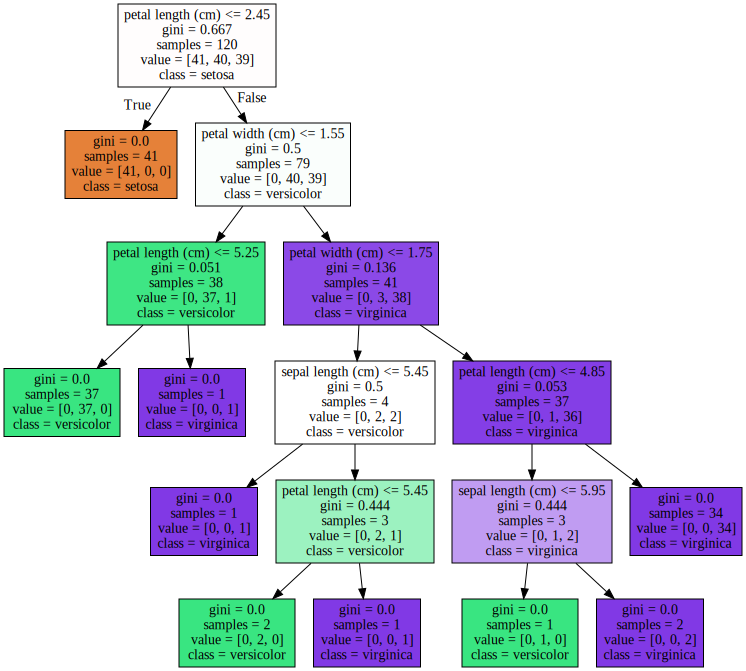

In [3]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 리프노드 : 더 이상 자식 노드가 없는 노드 , 최종 클래스(레이블) 값이 결정되는 노드
- 브랜치노드 : 자식 노드가 있는 노드

[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

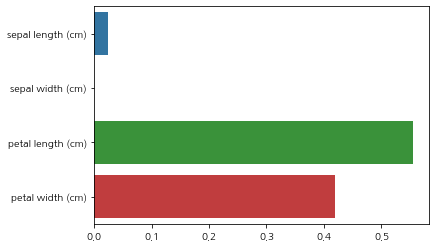

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline
# feature importance : 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지 정규화된 값으로 표현
# feature importance 추출
print(np.round(dt_clf.feature_importances_,3))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

# 시각화
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 결정 트리 과적합

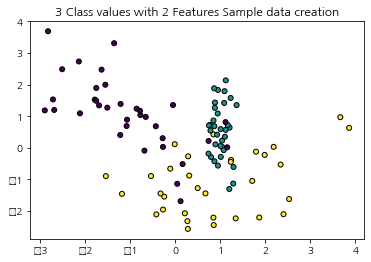

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')
# 분류를 위한 테스트용 데이터 생성 함수
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25,  edgecolor='k')

#### 결정트리 실습 - 사용자 행동 인식 데이터 세트
- 30명에게 스마트폰 센서 장착한 뒤 사람의 동작과 관련된 여러 피처 수집한 데이터

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
# 피처명 index 제거 후 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [7]:
# 중복된 피처명 확인 후 _1,_2를 추가로 부여해 변경
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [8]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                             if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [9]:
def get_human_dataset():
    # 공백으로 분리되어있으므로 sep에 공백문자 할당
    feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    # 중복된 피처명 수정
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습,테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습,테스트 레이블 데이터를 DataFrame으로 로딩, 칼럼명은 action으로 부여
    
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+',header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = get_human_dataset()

In [10]:
# 학습 피처 데이터 셋 살펴보기
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [11]:
X_train.head()
# 대부분 움직임 위치와 관련된 속성임

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [12]:
# 레이블 값 분포 확인
y_train['action'].value_counts()
# 비교적 고르게 분포돼있음

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [13]:
# DecisionTreeClassifier로 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

# 하이퍼 파라미터 추출
print(dt_clf.get_params())

0.8547675602307431
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [14]:
# 결정 트리의 트리 깊이(max_depth 변화)가 예측 정확도에 주는 영향 알아보기
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10],
         'min_samples_split':[16]}
grid_cv = GridSearchCV(dt_clf, n_jobs=-1,param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.6s finished


최고 평균 정확도 수치:0.8549
최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [15]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705


In [16]:
# 결정 트리의 정확도 측정
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도:{1:.4f}'.format(depth, accuracy))
    # max_depth = 8인 경우 가장 높은 정확도를 나타냄
    # 8을 넘어가면서 정확도가 계속 감소하고 있음.
    # 결정 트리는 깊이가 깊어질수록 과적합 영향력이 커지므로 정확도는 떨어짐

max_depth = 6 정확도:0.8551
max_depth = 8 정확도:0.8717
max_depth = 10 정확도:0.8599
max_depth = 12 정확도:0.8571
max_depth = 16 정확도:0.8599
max_depth = 20 정확도:0.8565
max_depth = 24 정확도:0.8565


In [17]:
# 정확도 성능 튜닝
params = {'max_depth':[8,12],
         'min_samples_split':[16,24]}
grid_cv = GridSearchCV(dt_clf, n_jobs=-1,param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.6s finished


최고 평균 정확도 수치:0.8549
최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [18]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정트리 예측 정확도',accuracy)

결정트리 예측 정확도 0.8717339667458432


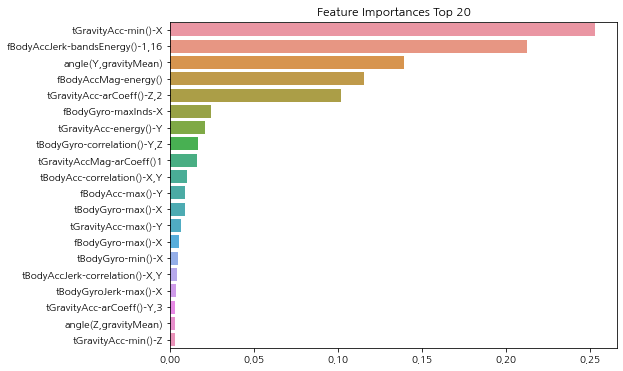

In [19]:
# 중요도가 높은 순으로 Top20 피처 시각화
ftr_importance_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 3. 앙상블 학습

#### 앙상블 학습 개요
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 단일 분류기보다 신뢰성이 높은 예측값 얻을 수 있음
- 정형 데이터 분류 시 앙상블이 뛰어난 성능을 나타냄

 **앙상블 학습의 유형**
- 여러 개의 분류기가 투표를 통해 최종 예측 결과 예측하는 방식
1. 보팅(Voting)
    - 서로 다른 알고리즘을 가진 분류기 결합
2. 배깅(Bagging) → Bootstrap Aggregating의 줄임말
    - 모두 같은 유형의 알고리즘 기반으로 데이터 샘플링을 서로 다르게 가져가면서 학습해 보팅 수행
    - 부트스트래핑(Bootstrapping) : 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
    - 데이터 세트 간 중첩 허용
    - 랜덤 포레스트 알고리즘
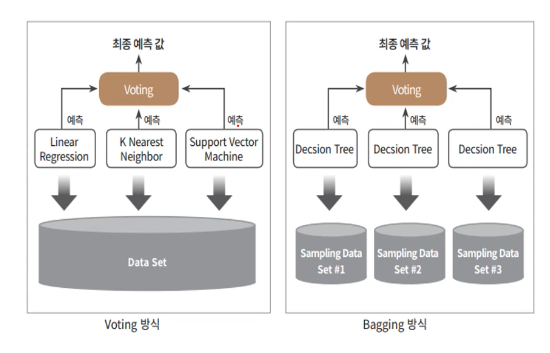
3. 부스팅(Boosting)
    - 여러 개의 분류기가 순차적으로 학습 수행하되, 앞에 학습한 분류기가 예측이 틀린 데이터에 올바르게 예측할 수 있도록 다음 분류기에 가중치 부여하며 학습과 예측 진행
    - 예측 성능이 뛰어나 앙상블 학습을 주도하며 그래디언트 부스트, XGBoost, LightGBM이 있음
- 외에도 스태깅을 포함한 다양한 앙상블 방법 존재
- 스태깅 : 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과 예측

#### 보팅 유형 - 하드 보팅과 소프트 보팅
1. 하드 보팅
     - 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
2. 소프트 보팅
    - 분류기들의 레이블 값 결정 확률을 모두 더한 후 이를 평균해 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
    - 일반적으로  하드 보팅보다 예측 성능이 좋아 소프트 보팅이 더 많이 사용됨
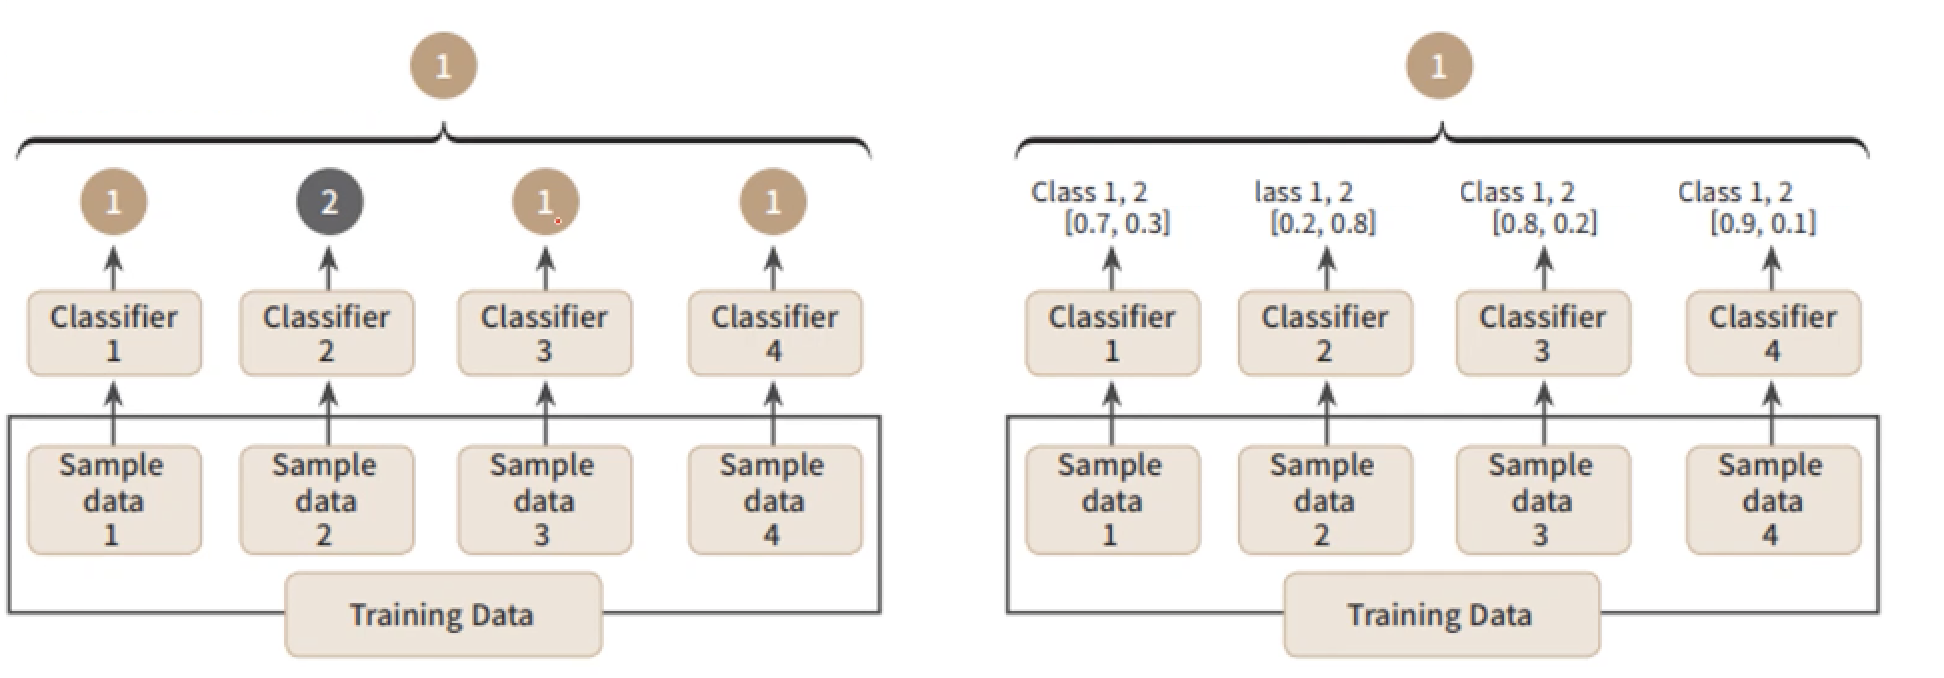

#### 보팅 분류기
- VotingClassifier : 사이킷런에서 제공하는 보팅 방식의 앙상블 구현 클래스

위스콘신 유방암 데이터 세트 예측 분석 by Voting 

In [20]:
# 로지스틱회귀와 KNN 사용
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [21]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
# Voting 분류기의 예측 성능이 무조건 더 높은 것은 아니지만 전반적으로 단일 ML알고리즘보다 뛰어난 예측 성능 가지는 경우가 많음.
# 데이터 특성과 분포 등 다양한 요건에 따라 달라짐

Voting 분류기 정확도:0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 현실 데이터에 대한 높은 유연성이 ML모델의 중요한 평가요소가 됨   
- 편향-분산 트레이드오프 → ML모델이 극복해야 할 중요 과제
- 배깅,부스팅은 대부분 결정 트리 알고리즘을 기반으로 함
- 앙상블 학습에서는 결정 트리 알고리즘의 단점(과적합)을 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복함

### 4. 랜덤 포레스트

#### 랜덤 포레스트 개요 및 실습
- 배깅의 대표적인 알고리즘
- 앙상블 알고리즘 중 비교적 빠른 수행 속도
- 다양한 영역에서 높은 예측 성능 보임
- 결정 트리를 기반으로 하며 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음(대부분의 부스팅 기반 앙상블 알고리즘은 결정트리를 기반으로 함)
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자 데이터 샘플링해 개별적 학습 수행한 후 최종적으로 보팅을 통해 예측 결정
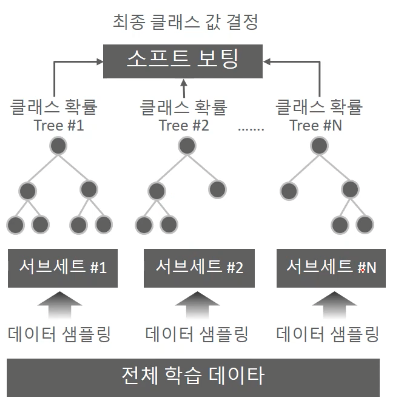

- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임
- 부트 스트래핑 분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것
- 랜덤 포레스트의 서브 세트 데이터 건 수 = 전체 데이터 건수
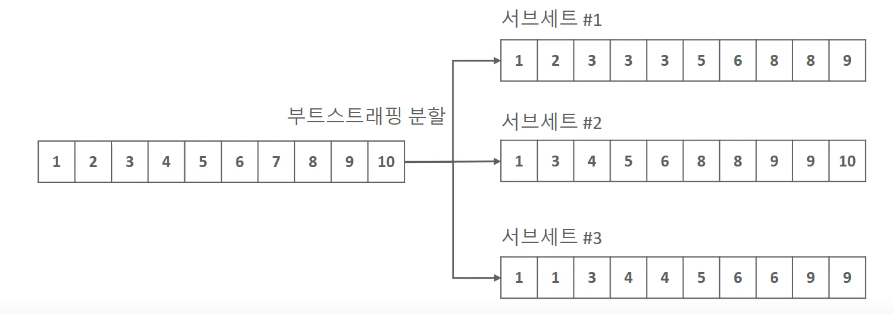

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))
# 약 91.96%의 정확도를 보여줌

랜덤 포레스트 정확도:0.9196


#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- 트리 기반 앙상블 알고리즘의 단점
    - 하이퍼 파라미터가 너무 많고 그로 인해 튜닝 시간이 많이 소모 됨 → 트리 기반 하이퍼 파라미터 + 배깅,부스팅,학습,정규화 등을 위한 하이퍼 파라미터도 추가되기 때문
    - 튜닝 후 예측 성능이 향상되는 경우가 많지 않음

In [27]:
# GridSearchCV로 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[8,6,24],
         'min_samples_leaf':[1,6,12],
         'min_samples_split':[2,8,16]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:',grid_cv.best_score_)

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9162132752992382


In [29]:
# 최적의 하이퍼 파라미터로 랜덤 포레스트 분류기 학습 후 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(accuracy_score(y_test,pred))

0.9260264675941635


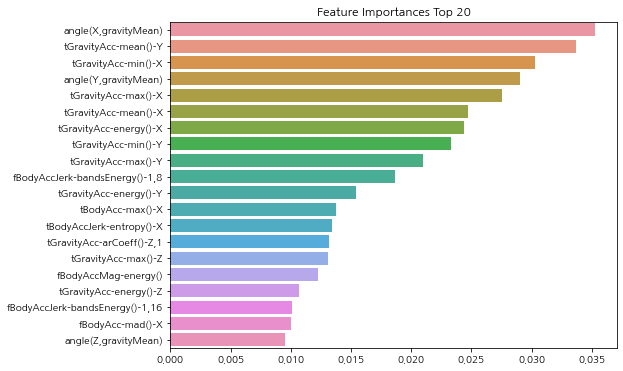

In [30]:
# 피처 중요도 시각화

ftr_importance_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 5. GBM(Gradient Boosting Machine)

#### GBM 개요 및 실습
- 부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여해 오류 개선해나가는 학습 방식
- 부스팅의 대표적 구현
    - AdaBoost(Adaptive boosting) : 오류 데이터에 가중치 부여하면서 부스팅 수행하는 대표적 알고리즘
    - 학습기가 순차적으로 오류 값에 대해 가중치 부여한 예측 결정 기준을 모두 결합해 예측 수행
    - 개별 약한 학습기보다 훨씬 정확도 높음
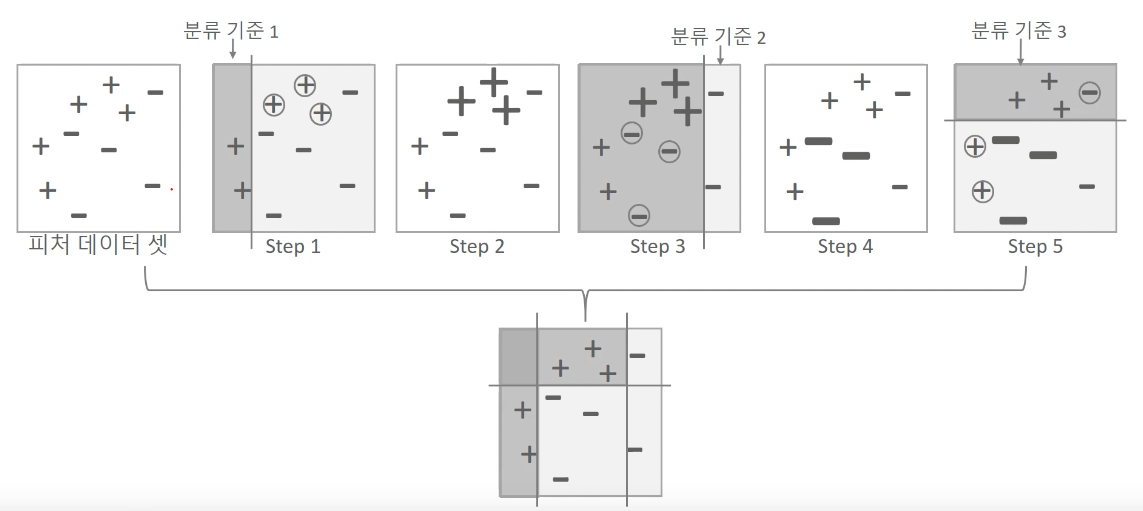       
    - GBM(Gradient Boost Machine) : 에이다 부스트와 유사하나 가중치 업데이트에 경사 하강법(Gradient Descent)을 이용함
    - 오류값 = 실제값 - 예측값
    - 오류식 h(x) = y - F(x) , y:분류 실제 결과값, x1,x2,.xn :피처 , F(x):피처 기반 예측 함수
    - 경사 하강법 : 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값 업데이트 함.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간:{0:.1f}초'.format(time.time() - start_time))
# 기본 하이퍼 파라미터로 앞의 랜덤 포레스트보다 더 나은 예측 성능을 나타냄.
# 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 뛰어난 경우가 많지만 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 도력도 더 필요함
# 순차적으로 예측 오류 보정을 통해 학습 수행하므로 멀티 CPU 코어 시스템 사용해도 병렬 처리 지원 X 

GBM 정확도:0.9389
GBM 수행 시간:804.3초


#### GBM 하이퍼 파라미터 소개
- loss: 경사 하강법에 사용할 비용 함수 지정, 특별한 이유 없으면 기본값인 'deviance' 그대로 적용
- learning_rate: GMB이 학습을 진행할 때마다 적용하는 학습률, 0~1사이 값 지정가능 기본값은 0.1
    - 너무 작은 경우 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 있고 수행 시간이 오래 걸림
    - 너무 크게 설정할 경우 모든 weak learner의 반복이 완료돼도 최소 오류값 찾지 못해 예측 성능이 떨어질 수 있지만 빠른 수행 가능
    - n_estimators와 상호 보완적으로 조합해 사용
- n_estimators: weak learner의 개수, 개수가 많을 수록 예측 성능이 일정 수준까지 좋아질 수 있지만 오래걸림, 기본값은 100
- subsample : weak learner가 학습에 사용하는 데이터 샘플링 비율, 기본값 = 1, 과적합이 염려되는 경우 1보다 작은 값으로 설정
   
- GBM은 과적합에 강하며 예측성능이 뛰어나지만 수행 시간이 오래 걸림

### 6. XGBoost(eXtra Gradient Boost)

#### XGBoost 개요
- 트리 기반 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
- 분류에 있어 일반적으로 다른 머신러닝보다 뛰어난 예측 성능 나타냄
- GBM을 기반으로 하지만 GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결
- 병렬 CPU 환경에서 병렬 학습 가능

**주요 장점**
1. 뛰어난 예측 성능
2. GBM 대비 빠른 수행 시간
3. 과적합 규제
4. Tree pruning
5. 자체 내장된 교차 검증
6. 결손값 자체 처리   

- XGBoost는 C/C++로 작성된 라이브러리로 사이킷런 프레임워크를 기반으로 하지 않기 때문에 fit(), predict()같은 사이킷런 고유 아키텍처 적용 불가능
- 사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class) 제공
- 사이킷런 래퍼 클래스 → XGBClassifier , XGBRegressor
- 파이썬 래퍼 XGBoost 모듈 : 초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost
- 사이킷런 래퍼 XGBoost 모듈 : 사이킷런과 연동되는 모듈

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

#### 파이썬 래퍼 XGBoost 하이퍼 파라미터
- GBM과 유사한 하이퍼 파라미터 제공 + 조기 중단(early stopping), 과적합 규제 하이퍼 파라미터 등 추가
- 일반 파라미터 : 일반적으로 실행 시 스레드 개수나 silent 모드 등 선택을 위한 파라미터
- 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등 관련 파라미터 등 지칭
- 학습 태스크 파리미터 : 학습 수행 시 객체 함수, 평가 위한 지표 등 설정하는 파라미터
- 대부분의 하이퍼 파라미터는 부스터 파라미터에 속함

**주요 일반 파라미터** 
- booster : gbtree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree
- silent : 디폴트는 0, 출력 메세지를 나타내고 싶지 않을 경우 1로 설정
- nthread : CPU 실행 스레드 개수 조정, 디폴트는 전체 스레드 모두 사용

**주요 부스터 파라미터**
- eta[default=0.3, alias:learning_rate] : GBM의 학습률과 같은 파라미터 , 파이썬 래퍼 xgboost의 디폴트는 0.3, 사이킷런 래퍼 클래스는 0.1
- num_boost_rounds : GBM의 n_estimators와 같은 파라미터
- min_child_weight[default=1] : 트리에서 추가적으로 가지 나눌지 결정하기 위해 필요한 데이터들의 weight 총합, 클수록 분할 자제
- gamma [default=0, alias:min_split_loss] : 트리 리프 노드 추가로 나눌 지 결정할 최소 손실 감소 값, 해당 값보다 큰 손실이 감소된 경우 리프 노드 분할, 클수록 과적합 감소 효과
- max_depth[default=6] : 트리 기반 알고리즘의 max_depth와 동일, 0으로 지정 시 깊이 제한 없음 (보통 3~10)
- sub_sample[default=1] : GBM의 subsample과 동일 (보통 0.5~1)
- colsample_bytree[default=1] : GBM의 max_features와 유사
- lambda[default=1, alias:reg_lambda] : L2 Regularization 적용 값
- alpha[default=0, alias:reg_alpha] : L1 Regularization 적용 값
- scale_pos_weight[default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형 유지

**학습 태스크 파라미터**
- objective : 최소값 가져야 할 손실 함수 정의
- binary : 이진 분류일 때 적용 
- multi:softmax : 다중 분류일 때 적용, num_class 파라미터 지정해야함
- multi:softprob : 개별 레이블 클래스에 해당되는 예측 확률 반환
- eval_metric : 검증에 사용되는 함수 정의, 기본적으로 회귀는 rmse, 분류는 error
    - rmse , mae, logloss, error, merror, mlogloss, auc

**과적합 문제가 심각한 경우**
- eta값 낮추기(0.01~0.1) , num_round(n_estimators) 높여줘야함
- max_depth값 낮추기
- min_child_weight 값 높이기
- gamma값 높이기
- subsample과 colsample_bytree 조정

#### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- 종양의 크기, 모양 등 다양한 속성값을 기반으로 악성(malignant)인지 양성(benign)인지 분류한 데이터 세트

In [35]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [38]:
# 레이블 값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [39]:
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]
# 학습용, 테스트용 데이터 추출
X_train,X_test,y_train,y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
# 학습용 데이터를 학습과 검증용 데이터로 분리
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [40]:
# 파이썬 래퍼 XGBoost는 모두 전용 데이터 객체인 DMatrix로 생성하여 입력해야함.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [41]:
params = {'max_depth':3, 'eta':0.05, 'objective':'binary:logistic','eval_metric':'logloss'}
num_rounds = 400

In [42]:
eval_list = [(dtr,'train'),(dval,'eval')]

xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,
                     early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086


In [43]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

preds = [1 if x>0.5 else 0 for x in pred_probs]
print(preds[:10])

[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


#### 사이킷런 래퍼 XGBoost의 개요 및 적용

In [49]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, f1_score,confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [50]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                           eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [51]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


In [52]:
# 조기 중단
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

In [53]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9933


In [54]:
# 조기 중단을 급격하게 줄이면 예측 성능이 저하될 수 있음
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1